In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [6]:
new = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/30sep18/SalishSea_1h_20180930_20180930_chem_T.nc')
base = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/30sep18/SalishSea_1h_20180930_20180930_chem_T.nc', 
                                  data_vars = ['CO2_flux'])

In [7]:
def planview(base, new, field, it, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base_data = base[field][it, 400+iz:500-iz, 250+iz:350-iz]
    new_data = new[field][it, 400+iz:500-iz, 250+iz:350-iz]
    tmask_data = tmask[0, 400+iz:500-iz, 250+iz:350-iz]
    
    base_data.where(tmask_data).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new_data.where(tmask_data).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    diff_data = new_data - base_data
    diff_data.where(tmask_data).plot(ax=axs[2], cmap=cm_bwr, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    axs[0].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[1].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[2].scatter(304 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(304 - 280, 447 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 447 - 430, marker = 'x', color = 'g')

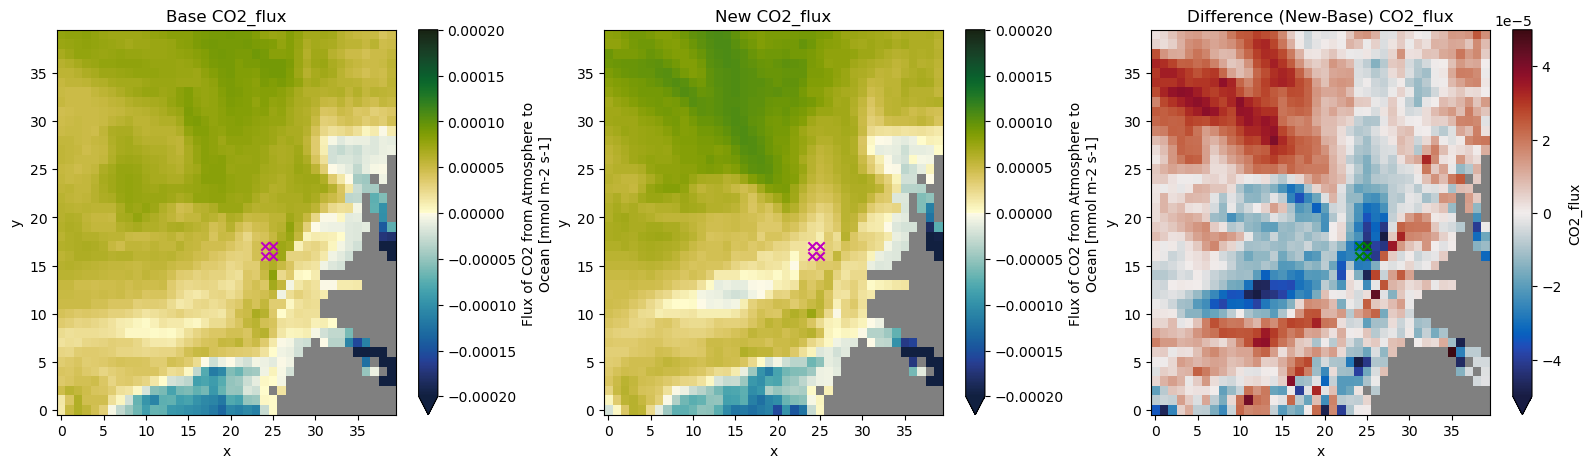

In [13]:
planview(base, new, 'CO2_flux', 23, cm_delta, 0.0002, -0.0002, 0.00005)

In [14]:
def planviewB(base, new, field, it, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base_data = base[field][it, 650+iz:750-iz, 130+iz:230-iz]
    new_data = new[field][it, 650+iz:750-iz, 130+iz:230-iz]
    tmask_data = tmask[0, 650+iz:750-iz, 130+iz:230-iz]

    
    base_data.where(tmask_data).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new_data.where(tmask_data).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    diff_data = new_data - base_data
    diff_data.where(tmask_data).plot(ax=axs[2], cmap=cm_bwr, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

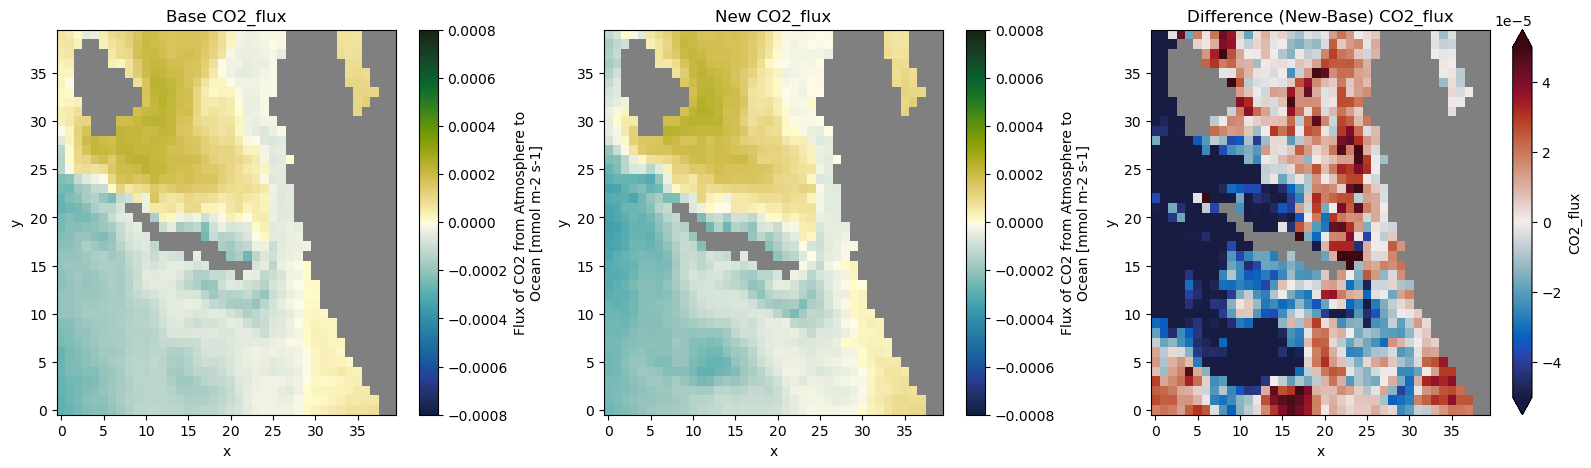

In [17]:
planviewB(base, new, 'CO2_flux', 23, cm_delta, 0.0008, -0.0008, 0.00005)